In [213]:
import sqlite3
import matplotlib.pyplot as plt 
import pandas as pd           # Data Manipulation
import numpy as np            # Linear Algebra
import seaborn as sns         # Data Visualization
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

In [214]:
# Connect to database
conn = sqlite3.connect('example.db')

In [162]:
# Use pandas to query data
sheet_name = "small countries are beautiful"
sql = "SELECT * FROM `small countries are beautiful`"
# sql += " WHERE `happy planet index`>2"
df = pd.read_sql_query(sql, conn)
cols = df.columns
cols

Index(['index', 'indicator', 'population', 'GDP ', 'GDP .1', 'GDP per km2 ',
       'land area (sq km)', 'population density ',
       'total foreign-born\npopulation ', '% foreign-born population',
       'population living abroad (diaspora)', 'population living abroad ',
       'happy planet index', 'world happiness report score',
       'human development index', 'health expenditure ',
       'education expenditure '],
      dtype='object')

In [163]:
df.head()

,index,indicator,population,GDP,GDP .1,GDP per km2,land area (sq km),population density,total foreign-born population,% foreign-born population,population living abroad (diaspora),population living abroad,happy planet index,world happiness report score,human development index,health expenditure,education expenditure
0,4,Albania,2900000,34.2,11840.2,1248266.29680999,27398,104.8706934,57616,3.1,1122910,27.94,20.2,4.639548302,0.785,774,-
1,5,Armenia,3000000,25.8,8621,914796.298266142,28203,102.9311556,191199,10.6,937299,23.70,25.7,4.287736416,0.755,883,89.7707766002676
2,6,Bahamas,400000,9,24555.2,899100.899100899,10010,39.4966034,59306,16.3,40095,9.35,-,-,0.807,1699,-
3,7,Bahrain,1300000,66.9,50704.1,88026315.7894737,760,1935.906615,704137,54.7,55964,4.00,-,6.227320671,0.846,2453,616.454863116381
4,8,Barbados,300000,4.8,17100.2,11162790.6976744,430,664.4627907,34475,11.3,98464,26.16,-,-,0.8,1234,1013.01418092476


In [215]:
# Transform df(Dataframe) to numeric dtype
int_list = [2,8,10,15]
for i in int_list:
    a=pd.to_numeric(df[cols[i]],downcast='signed', errors='coerce')
    df[cols[i]]=a

float_list = list(range(len(cols)))
for i in int_list:
    float_list.remove(i)
float_list.remove(0)
float_list.remove(1)
for i in float_list:
    a = pd.to_numeric(df[cols[i]],downcast='float', errors='coerce')
    df[cols[i]]=a
print(df.dtypes)
df.describe()

index                                    int64
indicator                               object
population                               int32
GDP                                    float32
GDP .1                                 float32
GDP per km2                            float32
land area (sq km)                      float32
population density                     float32
total foreign-born\npopulation         float64
% foreign-born population              float32
population living abroad (diaspora)    float64
population living abroad               float32
happy planet index                     float32
world happiness report score           float32
human development index                float32
health expenditure                     float64
education expenditure                  float32
dtype: object


,index,population,GDP,GDP .1,GDP per km2,land area (sq km),population density,total foreign-born population,% foreign-born population,population living abroad (diaspora),population living abroad,happy planet index,world happiness report score,human development index,health expenditure,education expenditure
count,67.000000,6.700000e+01,67.000000,67.000000,6.700000e+01,6.700000e+01,67.000000,6.600000e+01,66.000000,6.600000e+01,66.000000,40.000000,36.000000,65.000000,64.000000,25.000000
mean,37.000000,1.873134e+06,42.468658,21050.867188,4.926014e+06,1.129006e+05,187.123154,2.519489e+05,12.030303,2.677144e+05,13.683789,24.982500,5.657055,0.722892,1243.468750,884.849548
std,19.485037,1.565981e+06,70.891792,24102.552734,1.330982e+07,2.615725e+05,345.606232,5.224584e+05,15.574268,3.437945e+05,10.865997,7.857770,1.033812,0.131185,1298.889293,1155.824097
min,4.000000,1.000000e+05,0.200000,651.900024,5.136568e+03,2.980000e+02,1.979741,2.394000e+03,0.100000,2.844000e+03,0.270000,13.200000,3.475862,0.367000,32.000000,2.562006
25%,20.500000,4.500000e+05,3.450000,6107.699951,1.999509e+05,4.580500e+03,26.847158,1.503900e+04,2.525000,5.610400e+04,4.387500,17.975000,4.858589,0.627000,329.250000,175.205673
50%,37.000000,1.300000e+06,18.400000,11840.200195,8.128644e+05,2.280600e+04,73.725876,6.555250e+04,6.950000,1.179250e+05,11.865000,24.000000,5.914078,0.741000,862.000000,381.442993
75%,53.500000,3.000000e+06,40.350000,26656.000000,2.714977e+06,6.578150e+04,187.860344,1.922048e+05,14.100000,3.446515e+05,18.515000,30.325001,6.238726,0.807000,1666.750000,1013.014160
max,70.000000,4.900000e+06,329.200012,127659.601562,8.802631e+07,1.553556e+06,1935.906616,2.866136e+06,73.800003,1.650772e+06,49.110001,44.700001,7.476214,0.938000,6382.000000,4762.326660


In [195]:
# Data
df

,index,indicator,population,GDP,GDP .1,GDP per km2,land area (sq km),population density,total foreign-born population,% foreign-born population,population living abroad (diaspora),population living abroad,happy planet index,world happiness report score,human development index,health expenditure,education expenditure
0,4,Albania,2900000,34.200001,11840.200195,1.248266e+06,27398.0,104.870697,57616.0,3.100000,1122910.0,27.940001,20.200001,4.639548,0.785,774.0,NaN
1,5,Armenia,3000000,25.799999,8621.000000,9.147963e+05,28203.0,102.931152,191199.0,10.600000,937299.0,23.700001,25.700001,4.287736,0.755,883.0,89.770775
2,6,Bahamas,400000,9.000000,24555.199219,8.991009e+05,10010.0,39.496605,59306.0,16.299999,40095.0,9.350000,NaN,NaN,0.807,1699.0,NaN
3,7,Bahrain,1300000,66.900002,50704.101562,8.802631e+07,760.0,1935.906616,704137.0,54.700001,55964.0,4.000000,NaN,6.227321,0.846,2453.0,616.454834
4,8,Barbados,300000,4.800000,17100.199219,1.116279e+07,430.0,664.462769,34475.0,11.300000,98464.0,26.160000,NaN,NaN,0.800,1234.0,1013.014160
5,9,Belize,400000,3.100000,8219.900391,1.359291e+05,22806.0,16.426172,53860.0,15.000000,59884.0,14.290000,33.799999,NaN,0.708,524.0,313.669464
6,10,Bhutan,800000,6.500000,8227.400391,1.692973e+05,38394.0,21.187658,51106.0,6.700000,44190.0,5.400000,28.600000,NaN,0.612,287.0,147.861725
7,11,Bosnia and Herzegovina,3900000,42.200001,10957.500000,8.244281e+05,51187.0,68.496429,34803.0,0.600000,1650772.0,30.230000,25.299999,5.089902,0.768,1102.0,227.594345
8,12,Botswana,2200000,36.700001,17041.599609,6.475747e+04,566730.0,4.043656,160644.0,7.200000,58346.0,2.510000,16.600000,3.504881,0.717,970.0,NaN
9,13,Brunei Darussalam,400000,32.500000,76884.000000,6.172840e+06,5265.0,81.346680,102733.0,49.299999,46237.0,9.850000,NaN,NaN,0.853,2083.0,1392.602173


In [209]:
# Normalize the data except a few cols
to_norm = df[cols[2:-2]]
df_norm = ((to_norm - to_norm.min())/(to_norm.max()-to_norm.min()))*20
df_norm

,population,GDP,GDP .1,GDP per km2,land area (sq km),population density,total foreign-born population,% foreign-born population,population living abroad (diaspora),population living abroad,happy planet index,world happiness report score,human development index
0,11.666667,2.066869,1.761830,0.282461,0.348944,1.064062,0.385663,0.814111,13.593628,11.330876,4.444445,5.817919,14.640981
1,12.083333,1.556231,1.254900,0.206691,0.359309,1.044004,1.318589,2.849389,11.340969,9.594595,7.936508,4.059015,13.590192
2,1.250000,0.534954,3.764071,0.203125,0.125053,0.387986,0.397466,4.396200,0.452095,3.718264,NaN,NaN,15.411557
3,5.000000,4.054711,7.881759,20.000000,0.005949,20.000000,4.900881,14.816826,0.644688,1.527436,NaN,13.756083,16.777584
4,0.833333,0.279635,2.590126,2.535220,0.001700,6.851170,0.224050,3.039348,1.160488,10.601965,NaN,NaN,15.166374
5,1.250000,0.176292,1.191739,0.029718,0.289817,0.149400,0.359432,4.043419,0.692263,5.741196,13.079365,NaN,11.943958
6,2.916667,0.382979,1.192920,0.037300,0.490530,0.198642,0.340198,1.791045,0.501794,2.100737,9.777778,NaN,8.581435
7,15.833333,2.553191,1.622831,0.186158,0.655255,0.687892,0.226340,0.135685,20.000000,12.268631,7.682539,8.069492,14.045534
8,8.750000,2.218845,2.580898,0.013547,7.293469,0.021344,1.105197,1.926730,0.673597,0.917281,2.158731,0.145083,12.259193
9,1.250000,1.963526,12.004328,1.401414,0.063956,0.820785,0.700754,13.351425,0.526637,3.923014,NaN,NaN,17.022766


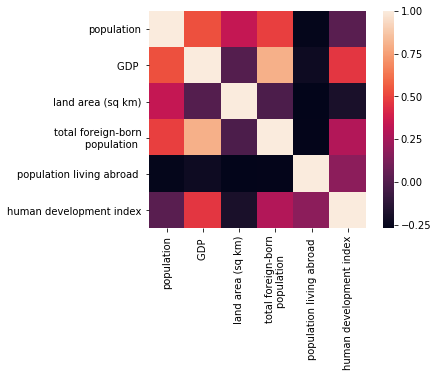

In [212]:
# Subset the data to key cols
# Visualize correlation in a heapmap
cols_name = [cols[i] for i in [2,3,6,8,11,14]]
df_corr = df_norm[cols_name]
cor = df_corr.corr()
sns.heatmap(cor, square = True)